In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm

import seaborn as sns
import pandas as pd

In [2]:
plt.style.use("seaborn-whitegrid")

In [5]:
b1 = [0.9  , 0.919, 0.937, 0.956, 0.975, 0.993, 1.01 , 1.03 , 1.05 ,
      1.07 , 1.09 , 1.11 , 1.12 , 1.14 , 1.16 , 1.18 , 1.2  , 1.22 ,
      1.24 , 1.25 , 1.27 , 1.29 , 1.31 , 1.33 , 1.35 , 1.37 , 1.38 ,
      1.4  , 1.42 , 1.44 , 1.46 , 1.48 , 1.5  , 1.52 , 1.53 , 1.53 ,
      1.55 , 1.57 , 1.59 , 1.61 , 1.62 , 1.63 , 1.65 , 1.66 , 1.68 ,
      1.7  , 1.72 , 1.74 , 1.76 , 1.78 , 1.79 , 1.81 , 1.83 , 1.85 ,
      1.87 , 1.89 , 1.91 , 1.93 , 1.94 , 1.96 , 1.98 , 2.   ]
b2 = b1
density = np.load("two_field_density.npy")
persistence = np.load("two_field_persistence.npy")

# Let's check if density when $b_1 = b_2$ is simmilar with regular game

<IPython.core.display.Javascript object>


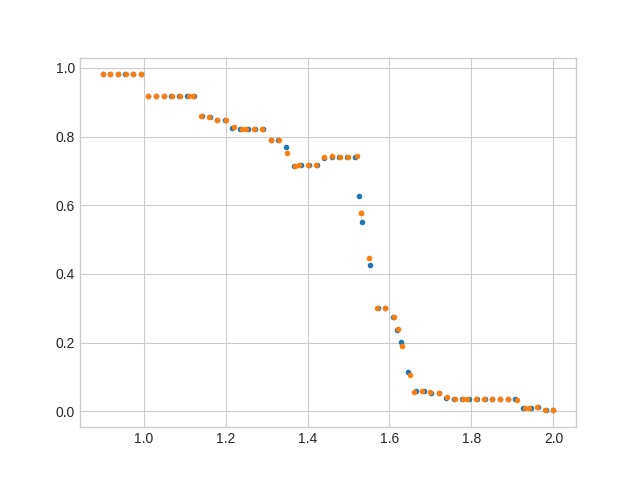

In [4]:
fig = plt.figure('Game Comparison')
plt.plot([0.9, 0.91864407, 0.93728814, 0.9559322 , 0.97457627,
     0.99322034, 1.01186441, 1.03050847, 1.04915254, 1.06779661,
     1.08644068, 1.10508475, 1.12372881, 1.14237288, 1.16101695,
     1.17966102, 1.19830508, 1.21694915, 1.23559322, 1.25423729,
     1.27288136, 1.29152542, 1.31016949, 1.32881356, 1.34745763,
     1.36610169, 1.38474576, 1.40338983, 1.4220339 , 1.44067797,
     1.45932203, 1.4779661 , 1.49661017, 1.51525424, 1.526     ,
     1.53389831, 1.55254237, 1.57118644, 1.58983051, 1.60847458,
     1.618     , 1.62711864, 1.64576271, 1.66440678, 1.68305085,
     1.70169492, 1.72033898, 1.73898305, 1.75762712, 1.77627119,
     1.79491525, 1.81355932, 1.83220339, 1.85084746, 1.86949153,
     1.88813559, 1.90677966, 1.92542373, 1.9440678 , 1.96271186,
     1.98135593, 2.0], np.load("data/200MeanGame/density.npy").mean(axis=-1).mean(axis=-1), ".")
plt.plot(b1,density.mean(axis=-1).diagonal(), ".")
plt.show()

# Now let's look at average density for two fields

<IPython.core.display.Javascript object>


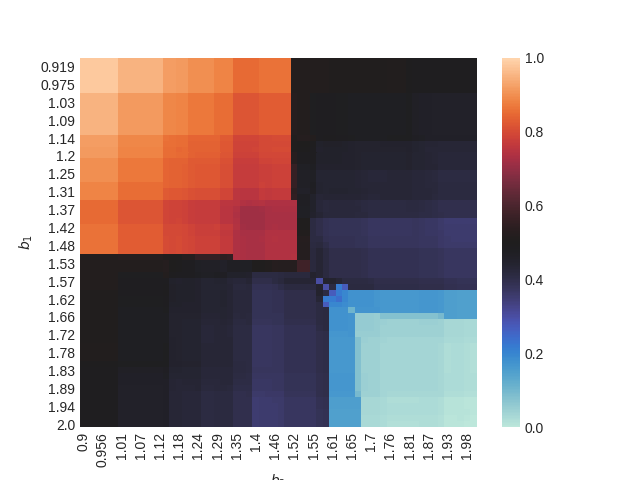

In [5]:
fig = plt.figure('Avg density')
plot = sns.heatmap(density.mean(axis=-1), vmin=0, vmax=1, center=1/2, xticklabels=b2, yticklabels=b1)
plot.set(xlabel='$b_2$', ylabel='$b_1$')
for ind, label in enumerate(plot.get_xticklabels()+plot.get_yticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

In [7]:
fig = plt.figure("Some b1")
for i in range(8):
    plt.plot(b2, density[7*i].mean(axis=-1), label=f"$b_1={b1[4*i]}$")
plt.plot(b2, density[-1].mean(axis=-1), label=f"$b_1={b1[-1]}$")
plt.ylabel('$(f_1+f_2)/(2)$')
plt.xlabel('$b_2$')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


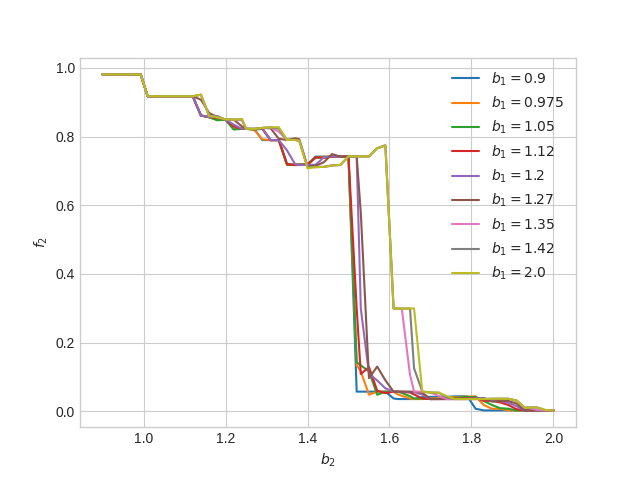

In [8]:
fig = plt.figure("f_2")
for i in range(8):
    plt.plot(b2, density[7*i, ..., 1], label=f"$b_1={b1[4*i]}$")
plt.plot(b2, density[-1, ..., 1], label=f"$b_1={b1[-1]}$")
plt.ylabel('$f_2$')
plt.xlabel('$b_2$')
plt.legend()
plt.show()

In [9]:
from mpl_toolkits.mplot3d import axes3d

<IPython.core.display.Javascript object>


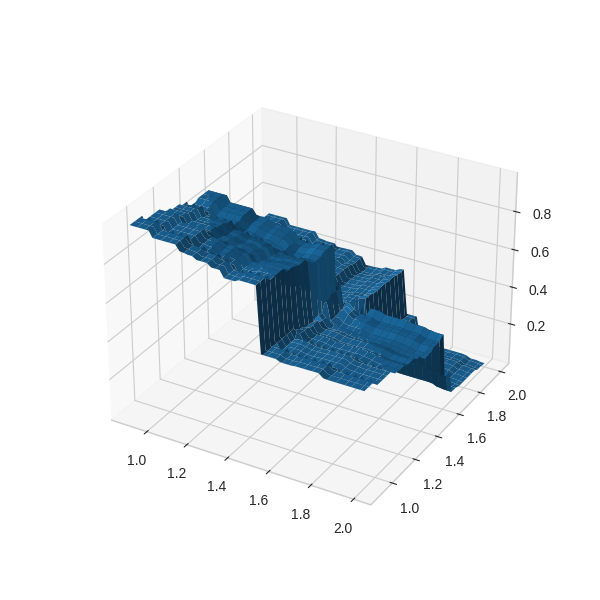

In [10]:
X,Y = np.meshgrid(b1, b2)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, density.mean(axis=-1))


plt.show()

<IPython.core.display.Javascript object>


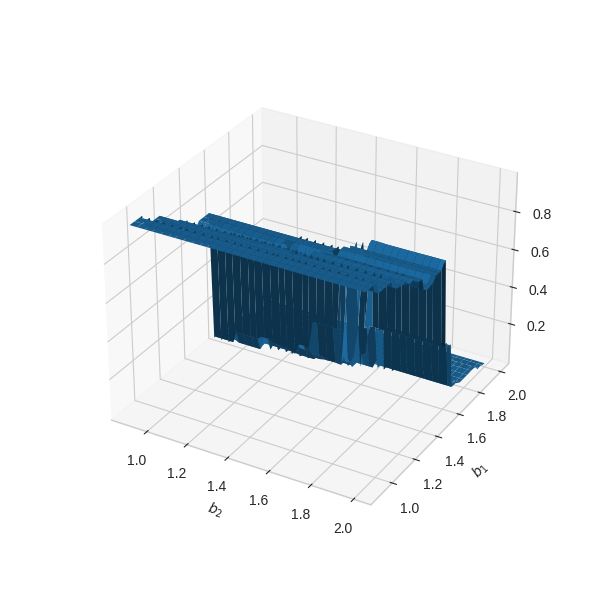

In [11]:
X,Y = np.meshgrid(b1, b2)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, density[..., 0])
ax.set_xlabel("$b_2$")
ax.set_ylabel("$b_1$")

plt.show()

## Two heatmaps

<IPython.core.display.Javascript object>


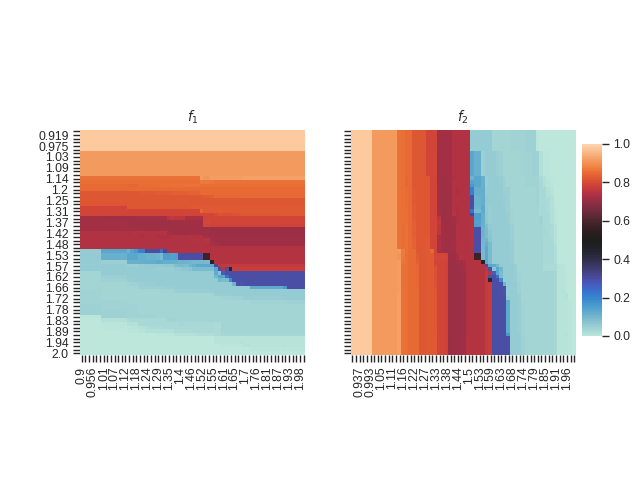

In [12]:
sns.set_context("paper")
grid_kws = {"width_ratios": (.5, .5), "hspace": .3}
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, gridspec_kw=grid_kws)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# ax1.set_box_aspect(1)
# ax2.set_box_aspect(1)
ax1.set_title("$f_1$")
ax2.set_title("$f_2$")
pl1 = sns.heatmap(density[..., 0], ax=ax1, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=False, square=True)
pl2 = sns.heatmap(density[..., 1], ax=ax2, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=True, cbar_ax=cbar_ax, square=True)
for ind, label in enumerate(pl1.get_xticklabels()+pl1.get_yticklabels()+pl2.get_xticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


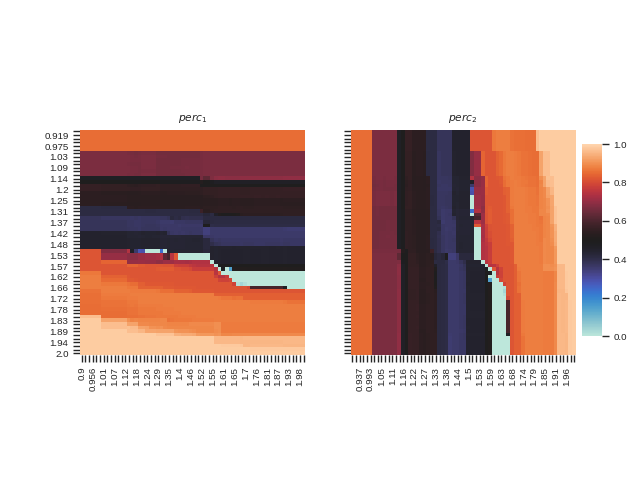

In [13]:
sns.set_context("paper", font_scale=0.8)
grid_kws = {"width_ratios": (.5, .5), "hspace": .3}
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, gridspec_kw=grid_kws)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# ax1.set_box_aspect(1)
# ax2.set_box_aspect(1)
ax1.set_title("$perc_1$")
ax2.set_title("$perc_2$")
pl1 = sns.heatmap(persistence[..., 0], ax=ax1, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=False, square=True)
pl2 = sns.heatmap(persistence[..., 1], ax=ax2, xticklabels=b2, yticklabels=b1,
            vmin=0, vmax=1, center=1/2, cbar=True, cbar_ax=cbar_ax, square=True)
for ind, label in enumerate(pl1.get_xticklabels()+pl1.get_yticklabels()+pl2.get_xticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:x
        label.set_visible(False)
plt.show()

## Persistence

<IPython.core.display.Javascript object>


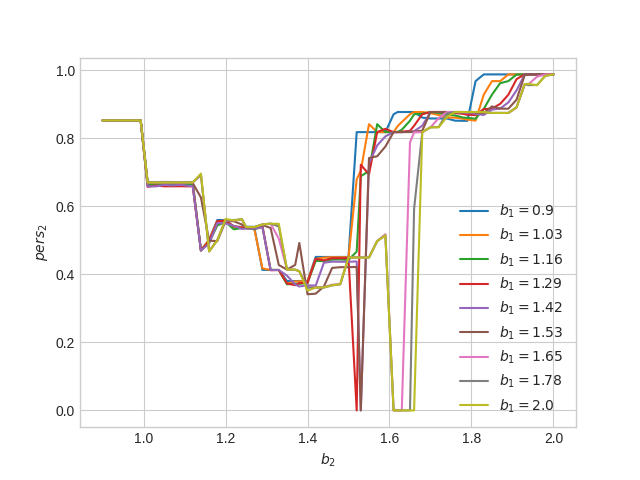

In [6]:
fig = plt.figure("Persistence f_2")
for i in range(8):
    plt.plot(b2, persistence[7*i, ..., 1], label=f"$b_1={b1[7*i]}$")
plt.plot(b2, persistence[-1, ..., 1], label=f"$b_1={b1[-1]}$")
plt.ylabel('$pers_2$')
plt.xlabel('$b_2$')
plt.legend()
plt.show()

# At $b_2=1.53$

In [14]:
pers = []
b1 = [1.2, 1.28, 1.365 , 1.44, 1.53]
b2 = [1.46, 1.48, 1.50, 1.53, 1.55, 1.57]
for i in [1000, 2000, 10000, 15000]:
    pers.append(np.load(f"pers{i}.npy"))

In [25]:
pers = []
b1 = [1.2   , 1.28, 1.365 , 1.44, 1.53]
b2 = [1.49, 1.495, 1.4975, 1.50, 1.5025, 1.505, 1.51, 1.53]
for i in [1000, 2000, 10000]:
    pers.append(np.load(f"pers_{i}.npy"))

<IPython.core.display.Javascript object>


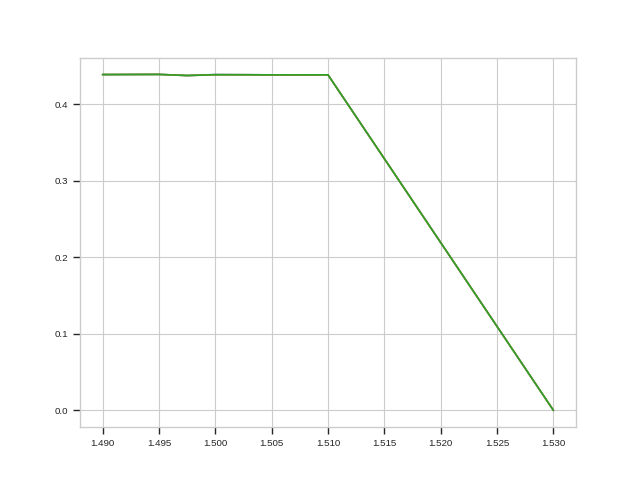

In [29]:
fig = plt.figure()
for t, p in zip([1000, 2000, 10000], pers):
    plt.plot(b2, p[3, ..., 1].mean(axis=-1), label=f"{t}")

<IPython.core.display.Javascript object>


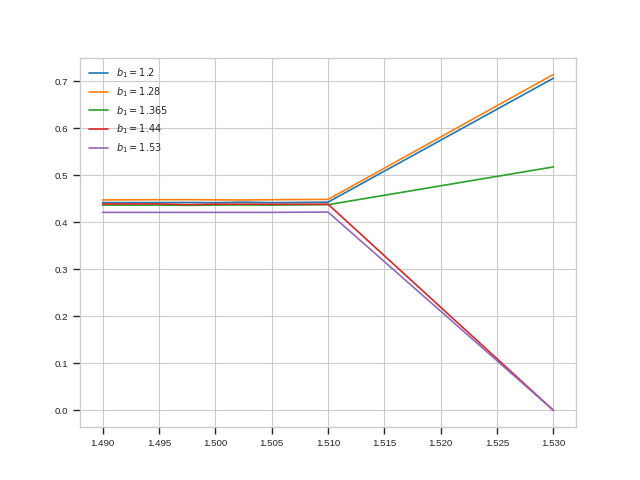

In [27]:
fig = plt.figure()
for i, i1 in enumerate(b1):
    plt.plot(b2, pers[2][i, ..., 1].mean(axis=-1), label=f"$b_1={i1}$")
    plt.legend()

In [17]:
pers[0][..., 1].shape

(24, 1, 40)

In [3]:
b1 = [1.2   , 1.28, 1.365 , 1.44, 1.53]
b2 = [1.524, 1.525, 1.526, 1.527, 1.528, 1.529, 1.53, 1.531, 1.532, 1.533, 1.534, 1.535, 1.536]
pers = np.load("pers153.npy")

<IPython.core.display.Javascript object>


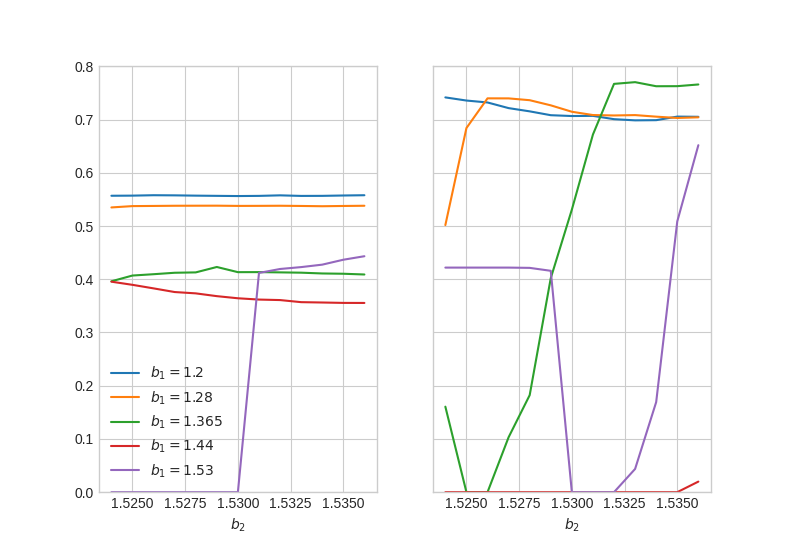

In [7]:
fig, axs = plt.subplots(1, 2, sharey=True)
for i, i1 in enumerate(b1):
    axs[0].plot(b2, pers[i, ..., 0].mean(axis=-1), label=f"$b_1={i1}$")
    axs[1].plot(b2, pers[i, ..., 1].mean(axis=-1), label=f"$b_1={i1}$")
axs[0].legend()
axs[0].set(xlabel="$b_2$", ylim=[0, .8])
axs[1].set(xlabel="$b_2$")
plt.savefig("figures/persistence_at_b_2_153.png", dpi=500)

In [25]:
from spatgames import DoubleMeanFieldGamePy
from tqdm import tqdm
L = 50
p_c=.9
game = DoubleMeanFieldGamePy(L, 1.3, 1.3)
f = np.random.choice((0, 1), (1, L, L), p=(1-p_c, p_c))
in_field = np.concatenate((f, f), axis=0)
print(in_field.shape)

(2, 50, 50)


In [26]:
b = np.array([0.9, 1.24, 1.4, 1.55, 1.7, 1.98])

In [27]:
fields = []
for b1 in tqdm(b):
    for b2 in b[b >= b1]:
        game.b = (b1, b2)
        game.field = in_field
        game.evolve(6000)
        fields.append(game.field)

100%|██████████| 6/6 [00:57<00:00,  9.52s/it]


In [28]:
fs = np.zeros((len(b), len(b), L, L))
for i, b1 in tqdm(enumerate(b)):
    for j, b2 in enumerate(b[b >= b1]):
        f = fields.pop(0)
        j += i
        fs[i, j] = f[0]
        fs[j, i] = f[1]

6it [00:00, 6481.03it/s]


<IPython.core.display.Javascript object>


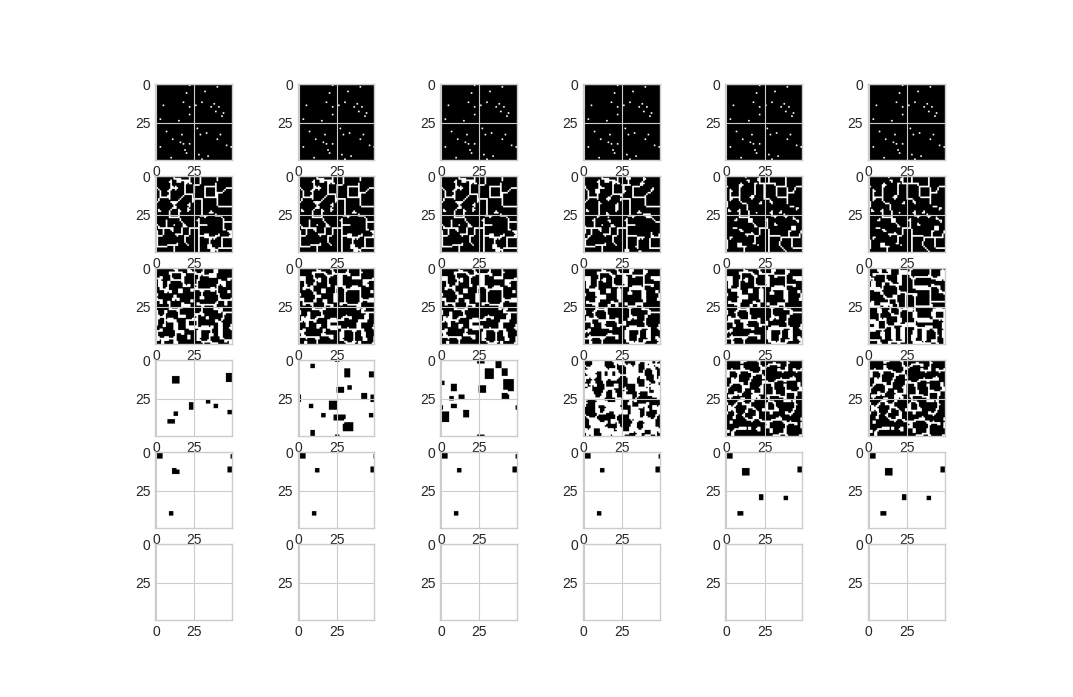

In [29]:
fig = plt.figure()
for i in range(len(b)*len(b)):
    fig.add_subplot(len(b), len(b), i+1)
    plt.imshow(fs[i//len(b), i%len(b)])

## Colored

In [5]:
from spatgames import DoubleMeanFieldGamePy, color_field_change
from tqdm import tqdm
L = 100
# bs = ((1.53, 1.527),
# (1.53, 1.528),
# (1.53, 1.529),
# (1.53, 1.53),
# (1.53, 1.531),
# (1.53, 1.532),
# (1.53, 1.533))
p_c=.9
game = DoubleMeanFieldGamePy(L, 1.3, 1.3)
f = np.random.choice((0, 1), (1, L, L), p=(1-p_c, p_c))
in_field = np.concatenate((f, f), axis=0)
print(in_field.shape)

(2, 100, 100)


In [24]:
b1=1.56
m = 1
bs = []
for b2 in [b1-.003, b1-.002, b1-.001, b1, b1+.001, b1+.002, b1+.003]:
    bs.append((b1, b2))

In [25]:
colored = []
black = np.zeros((100, 2, 3))+255
for b in tqdm(bs):
    game.b = b
    game.field = in_field.copy()
    game.evolve(5000)
    old_f = game.field.astype(int)
    game.evolve(1)
    new_f = game.field.astype(int)
    f1 = color_field_change(old_f[0], new_f[0])
    f2 = color_field_change(old_f[1], new_f[1])
    colored.append(np.concatenate([f1, black, f2], axis=1).astype(int))

100%|██████████| 7/7 [01:06<00:00,  9.43s/it]


<IPython.core.display.Javascript object>


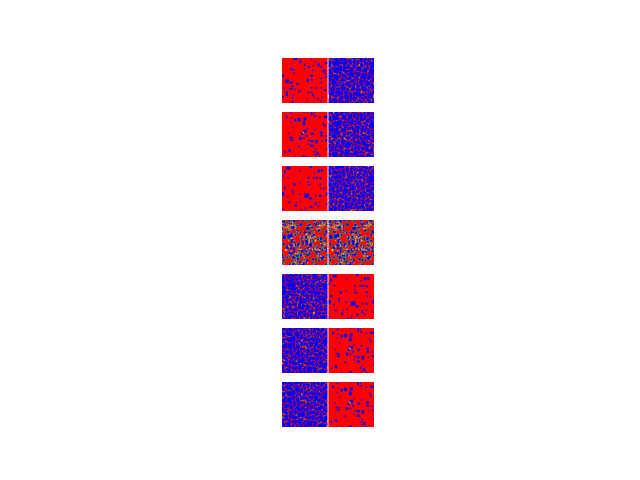

In [26]:
fig = plt.figure()
for i in range(len(bs)):
    fig.add_subplot(len(bs), 1, i+1, label=f"{bs[i]}")
    plt.imshow(colored[i])
    plt.axis('off')
plt.savefig(f"figures/colored_2fields{b1}.png", dpi=500)

In [27]:
b1

1.56

## Let's take a look at chaos line

### First, determine its borders

In [33]:
from spatgames import MeanGamePy, DoubleMeanFieldGamePy
from tqdm import tqdm
L = 100
p_c = 0.9
field = np.random.choice((0, 1), (L, L), p=(1-p_c, p_c))
bs = np.concatenate([np.linspace(1.52, 1.54, 15), np.linspace(1.628, 1.64, 15)])

In [34]:
ps = []
game = MeanGamePy(L, 1.6, percfrom=4000, perctill=5000)
for b in tqdm(bs):
    game.field = field.copy()
    game.b = b
    game.evolve(5000)
    ps.append(game.persistence)

100%|██████████| 30/30 [02:26<00:00,  4.87s/it]


In [35]:
bs[np.array(ps) == 0].min(), bs[np.array(ps) == 0].max()

(1.5257142857142858, 1.54)

In [22]:
bs[np.array(ps) == 0].min(), bs[np.array(ps) == 0].max()

(1.5257142857142858, 1.54)

In [23]:
bs

array([1.52      , 1.52142857, 1.52285714, 1.52428571, 1.52571429,
       1.52714286, 1.52857143, 1.53      , 1.53142857, 1.53285714,
       1.53428571, 1.53571429, 1.53714286, 1.53857143, 1.54      ,
       1.628     , 1.62885714, 1.62971429, 1.63057143, 1.63142857,
       1.63228571, 1.63314286, 1.634     , 1.63485714, 1.63571429,
       1.63657143, 1.63742857, 1.63828571, 1.63914286, 1.64      ])

In [39]:
bs = np.linspace(1.525, 1.545, 25)
delta = 0.001
n = 5
f = np.random.choice((0, 1), (1, L, L), p=(1-p_c, p_c))
field = np.concatenate((f, f), axis=0)

In [42]:
game = DoubleMeanFieldGamePy(L, 1.3, 1.3, percfrom=4000, perctill=5000)
persistence = np.zeros((len(bs), 2*n+1, 2))

for i, b in tqdm(enumerate(bs), total=len(bs)):
    for k in range(-n, n+1):
        game.field = field
        game.b = (b + k*delta/np.sqrt(2), b + k*delta/np.sqrt(2))
        game.evolve(5000)
        persistence[i, n+k] = game.persistence
    break

  4%|▍         | 1/25 [02:53<1:09:23, 173.47s/it]


KeyboardInterrupt: 

### Visualization

In [3]:
L = 100
p_c = 0.9
bs = np.linspace(1.52, 1.56, 30)
delta = 0.00001
# bs = np.linspace(1.51, 1.6, 60)
# delta = 0.001
n = 10
persistence = np.load("persistence_near_line2.npy")

<IPython.core.display.Javascript object>


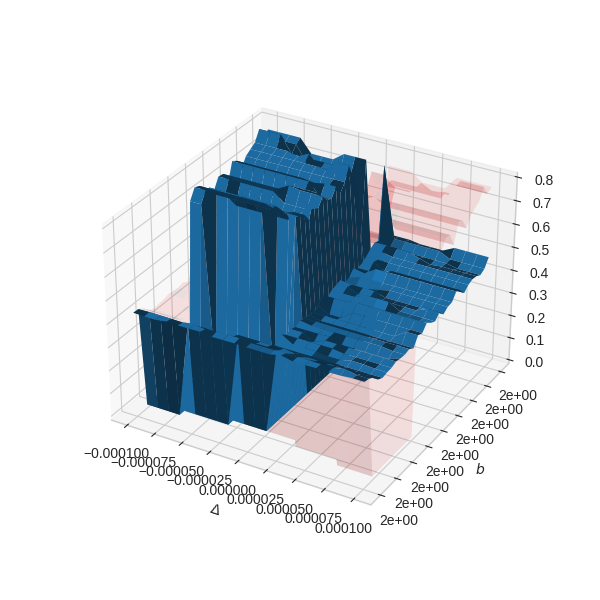

In [4]:
X,Y = np.meshgrid(np.array(range(-n, n+1))*delta, bs)


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(X, Y, persistence[..., 1])
ax.plot_surface(X, Y, persistence[..., 0], color='red', alpha=0.1)
ax.set_xlabel("$\Delta$")
ax.set_ylabel("$b$")

plt.show()

<IPython.core.display.Javascript object>


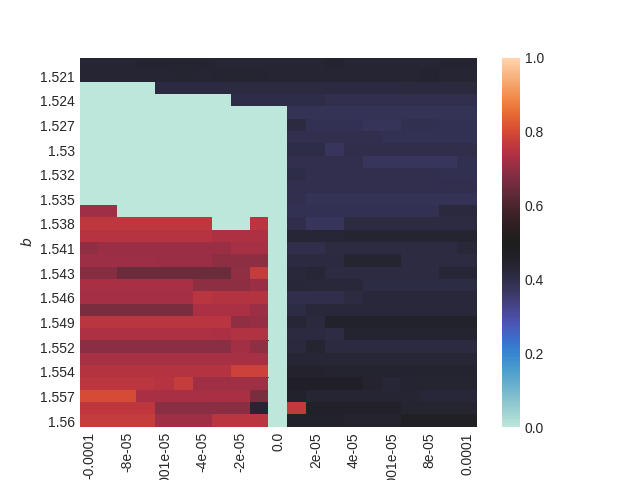

In [6]:
import matplotlib.ticker as ticker
fig = plt.figure('Persistence 2')
plot = sns.heatmap(persistence[..., 1],
                   vmin=0, vmax=1,
                   center=1/2,
                   xticklabels=np.array(range(-n, n+1))*delta,
                   yticklabels=np.array2string(bs, precision=3, max_line_width=300)[1:-1].split())
plot.set(xlabel='$\Delta$', ylabel='$b$')
for ind, label in enumerate(plot.get_xticklabels()+plot.get_yticklabels()):
    if ind % 2 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
y_labels = ax.get_yticks()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
plt.show()
plt.savefig("figures/persistence_chaos.png", dpi=500)

In [25]:
np.array2string(bs, precision=3, max_line_width=300)[1:-1].split()

['1.52',
 '1.521',
 '1.523',
 '1.524',
 '1.526',
 '1.527',
 '1.528',
 '1.53',
 '1.531',
 '1.532',
 '1.534',
 '1.535',
 '1.537',
 '1.538',
 '1.539',
 '1.541',
 '1.542',
 '1.543',
 '1.545',
 '1.546',
 '1.548',
 '1.549',
 '1.55',
 '1.552',
 '1.553',
 '1.554',
 '1.556',
 '1.557',
 '1.559',
 '1.56']

In [17]:
bs.astype('str')

array(['1.52', '1.5213793103448277', '1.5227586206896553',
       '1.5241379310344827', '1.5255172413793103', '1.526896551724138',
       '1.5282758620689656', '1.5296551724137932', '1.5310344827586206',
       '1.5324137931034483', '1.533793103448276', '1.5351724137931035',
       '1.5365517241379312', '1.5379310344827586', '1.5393103448275862',
       '1.5406896551724139', '1.5420689655172415', '1.543448275862069',
       '1.5448275862068965', '1.5462068965517242', '1.5475862068965518',
       '1.5489655172413794', '1.5503448275862068', '1.5517241379310345',
       '1.553103448275862', '1.5544827586206897', '1.5558620689655174',
       '1.5572413793103448', '1.5586206896551724', '1.56'], dtype='<U32')